In [2]:
import sys
import numpy as np
import tensorflow as tf

print("Python version:", sys.version)
print('tensorflow', tf.__version__)
print('numpy', np.__version__)

Python version: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
tensorflow 2.5.3
numpy 1.19.5


# 기초 operation

tf.add : 덧셈, subtract : 뺄셈, multiply : 곱셈, divide : 나눗셈

tf.pow : n-제곱, negative : 음수 부호, abs : 절대값, sign : 부호

tf.round : 반올림, tf.math.ceil : 올림, tf.floor : 내림, tf.math.square : 제곱

tf.math.sqrt : 제곱근, tf.maximum : 두 텐서의 각 원소에서 최대값만 반환, minumum : 최소값만 반환

tf.cumsum : 누적합, tf.math.cumprod : 누적곱 tf.math.log : 로그 값

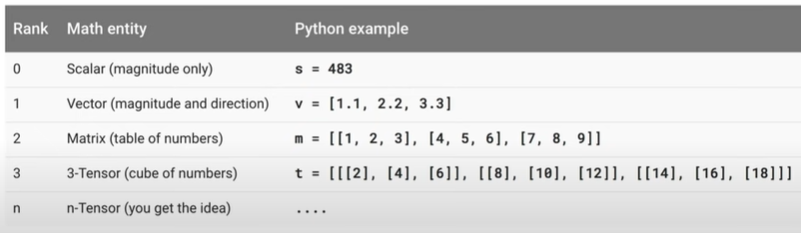

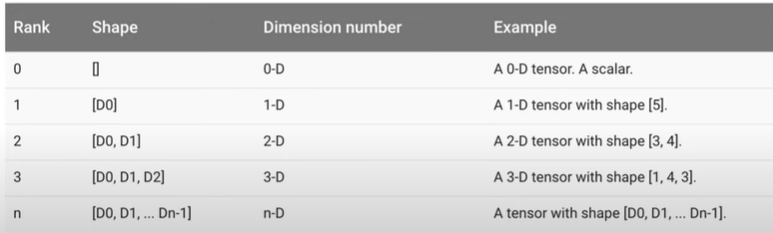

In [3]:
tf.floor(2.5)

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [27]:
tf.math.negative([2.5,3.4])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-2.5, -3.4], dtype=float32)>

In [14]:
node_a = tf.constant('hello')

print(node_a)

tf.Tensor(b'hello', shape=(), dtype=string)


In [11]:
node1 = tf.constant(3.0, tf.float32) #노드를 추가
node2 = tf.constant(4.0, tf.float32) #노드를 추가

# (버전1에서는 그래프를 build하고 run하고 variable을 업데이트하는 방식이었음)
#tf version2 : def를 이용해서 노드들만 빌드업하고 함수로 정의해서 실행 
def forward():
    return node1 + node2

out_a = forward()
print(out_a)

tf.Tensor(7.0, shape=(), dtype=float32)


In [16]:
node3 = tf.add(node1, node2)
print(node3)

tf.Tensor(7.0, shape=(), dtype=float32)


In [23]:
def adder(a,b):
    return a + b

node3 = tf.constant([1,3])
node4 = tf.constant([2,4])

print(adder(node3, node4))

tf.Tensor([3 7], shape=(2,), dtype=int32)


In [28]:
print(tf.maximum(node3, node4))
print(tf.cumsum(node4))

tf.Tensor([2 4], shape=(2,), dtype=int32)
tf.Tensor([2 6], shape=(2,), dtype=int32)


# linear regression

In [54]:
x_train = [1,2,3]
y_train = [1,2,3]

#초기 값 지정
W = tf.Variable(2.9)
b = tf.Variable(0.5)

hyp = x_train * W + b

cost = tf.reduce_mean(tf.square(hyp - y_train)) #에러 제곱의 평균
cost

<tf.Tensor: shape=(), dtype=float32, numpy=20.89667>

In [55]:
v = [1., 2., 3., 4.]
tf.reduce_mean(v) #평균

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

In [56]:
lr = 0.01

#변수들의 변화 정보를 tape에 기억
with tf.GradientTape() as tape:
    hyp = W * x_train + b
    cost = tf.reduce_mean(tf.square(hyp - y_train))
    
W_grad, b_grad = tape.gradient(cost, [W,b]) #gradeint method를 불러서 개별 미분값을 구해서 반환함.
print(W_grad, b_grad)

#w와 b 값을 업데이트 함 #assign_sub : A = A - B --> A -= B
W.assign_sub(lr*W_grad)
b.assign_sub(lr*b_grad)

W, b
# 여러 차례 업데이트 수행

tf.Tensor(19.733337, shape=(), dtype=float32) tf.Tensor(8.600001, shape=(), dtype=float32)


(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.7026668>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.41399997>)

In [31]:
tf.reduce_mean([1.0,2.0])

<tf.Tensor: shape=(), dtype=float32, numpy=1.5>

In [59]:
# 반복하는 버전
# 초기값을 이용해서, cost를 구하고 (실제값과 예측의 차이 이용), 선형식의 계수를 주어진 학습률에 따라 반영하는 방식

W = tf.Variable(2.9)
b = tf.Variable(0.5)

for ii in range(100):
    with tf.GradientTape() as tape:
        hyp = W * x_train + b
        cost = tf.reduce_mean(tf.square(hyp - y_train))

        W_grad, b_grad = tape.gradient(cost, [W,b]) #gradeint method를 불러서 개별 미분값을 구해서 반환함.
        W.assign_sub(lr*W_grad)
        b.assign_sub(lr*b_grad)
    if ii % 10 == 0:
        print("{:5}|{:10.4}|{:10.4}|{:10.6f}".format(ii, W.numpy(), b.numpy(), cost))
        
        # W는 1에 가깝게, b는 0에 가깝게 수렴함.
    

    0|     2.703|     0.414| 20.896669
   10|     1.608|  -0.05965|  1.999508
   20|     1.268|   -0.2013|  0.199676
   30|     1.161|   -0.2407|  0.027861
   40|     1.126|   -0.2486|  0.011085
   50|     1.114|   -0.2469|  0.009091
   60|     1.108|   -0.2423|  0.008524
   70|     1.105|    -0.237|  0.008110
   80|     1.102|   -0.2315|  0.007727
   90|     1.099|    -0.226|  0.007364


In [60]:
print(W * 5 + b)
print(W * 2.5 + b)

tf.Tensor(5.265382, shape=(), dtype=float32)
tf.Tensor(2.5221045, shape=(), dtype=float32)


# cost function

In [63]:
X = np.array([1,2,3])
Y = np.array([1,2,3])

def cost_func(W, X, Y):
    c = 0
    for ii in range(len(X)):
        c += (W * X[ii] - Y[ii]) ** 2 #제곱 누적합
    return c / len(X) #평균

#실제 W 값에 따른 cost 값 변화
for feed_W in np.linspace(-3,5, num=15):
    curr_cost = cost_func(feed_W, X, Y)
    print("{:6.3f} | {:10.5}".format(feed_W, curr_cost))

-3.000 |     74.667
-2.429 |     54.857
-1.857 |     38.095
-1.286 |     24.381
-0.714 |     13.714
-0.143 |     6.0952
 0.429 |     1.5238
 1.000 |        0.0
 1.571 |     1.5238
 2.143 |     6.0952
 2.714 |     13.714
 3.286 |     24.381
 3.857 |     38.095
 4.429 |     54.857
 5.000 |     74.667


In [64]:
def cost_func(W,X,Y):
    hyp = X * W #x와 관련된 식
    return tf.reduce_mean(tf.square(hyp - Y)) #실제값을 빼고 cost를 구하기 위해 평균을 구하기

W_values = np.linspace(-3,5, num=15)
cost_values = []
for feed_W in W_values:
    curr_cost = cost_func(feed_W, X, Y)
    cost_values.append(curr_cost)
    print("{:6.3f} | {:10.5}".format(feed_W, curr_cost))

-3.000 |     74.667
-2.429 |     54.857
-1.857 |     38.095
-1.286 |     24.381
-0.714 |     13.714
-0.143 |     6.0952
 0.429 |     1.5238
 1.000 |        0.0
 1.571 |     1.5238
 2.143 |     6.0952
 2.714 |     13.714
 3.286 |     24.381
 3.857 |     38.095
 4.429 |     54.857
 5.000 |     74.667


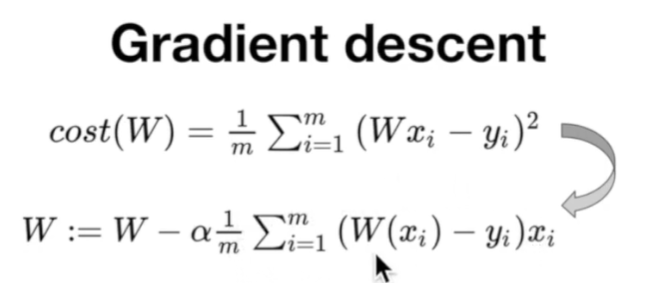

cost를 미분하면 아래의 식이 나오게 됨

In [67]:
alpha = 0.01
gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X)) #alpah 제외한 식 
descent = W - tf.multiply(alpha, gradient) # alpha를 뒤의 식에 곱함.
W.assign(descent) #W를 업데이트함.

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=2.7268045>

In [80]:
tf.random.set_seed(0)

x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable([50.0]) #임의 값 1개 설정
for step in range(300):
    hyp = W*x_data
    cost = tf.reduce_mean(tf.square(hyp - y_data))
    
    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, x_data) - y_data, x_data))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(step, cost.numpy(), W.numpy()[0]))

    0 | 17521.0000 |  46.375000
   10 |  3684.7588 |  22.169119
   20 |   775.0281 |  11.068729
   30 |   163.1184 |   5.978287
   40 |    34.4350 |   3.643900
   50 |     7.3732 |   2.573391
   60 |     1.6822 |   2.082474
   70 |     0.4854 |   1.857349
   80 |     0.2337 |   1.754110
   90 |     0.1808 |   1.706767
  100 |     0.1696 |   1.685056
  110 |     0.1673 |   1.675099
  120 |     0.1668 |   1.670534
  130 |     0.1667 |   1.668440
  140 |     0.1667 |   1.667480
  150 |     0.1667 |   1.667040
  160 |     0.1667 |   1.666838
  170 |     0.1667 |   1.666745
  180 |     0.1667 |   1.666703
  190 |     0.1667 |   1.666683
  200 |     0.1667 |   1.666674
  210 |     0.1667 |   1.666670
  220 |     0.1667 |   1.666668
  230 |     0.1667 |   1.666667
  240 |     0.1667 |   1.666667
  250 |     0.1667 |   1.666667
  260 |     0.1667 |   1.666667
  270 |     0.1667 |   1.666667
  280 |     0.1667 |   1.666667
  290 |     0.1667 |   1.666667


# multiple variable linear regression

H(x) = W * x + b

H(X) = XW (x1, x2, x3) * (w1, w2, w3)T = (x1 * w1 +  x2 * w2 + x3 * w3) 

(1 * 3) * (3 * 1) => 1 * 1 

In [2]:
# 일일히 작성하는 버전

x1 = [ 73.,  93.,  89.,  96.,  73.]
x2 = [ 80.,  88.,  91.,  98.,  66.]
x3 = [ 75.,  93.,  90., 100.,  70.]
Y  = [152., 185., 180., 196., 142.]

In [9]:
# weights
w1 = tf.Variable(tf.random.normal([1], 0, 1, tf.float32))
w2 = tf.Variable(tf.random.normal([1], 0, 1, tf.float32))
w3 = tf.Variable(tf.random.normal([1], 0, 1, tf.float32))
b  = tf.Variable(tf.random.normal([1], 0, 1, tf.float32))

print(w1.numpy(), w2.numpy(), w3.numpy(), b.numpy())

[-2.0668468] [-0.76387405] [0.18725923] [-0.16460438]


In [11]:
lr = 0.00001

for ii in range(1000+1):
    
    with tf.GradientTape() as tape:
        hyp = w1*x1 + w2*x2 + w3*x3 + b
        cost = tf.reduce_mean(tf.square(hyp - Y))
    w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1, w2, w3, b])
    
    w1.assign_sub(lr * w1_grad)
    w2.assign_sub(lr * w2_grad)
    w3.assign_sub(lr * w3_grad)
    b.assign_sub(lr * b_grad)
    
    #초기값들은 assign_sub, gradient_desent는 assign 사용
    
    if ii % 50 == 0 :
        print("{:5} | {:12.4f}".format(ii, cost.numpy()))

    0 |  158208.5625
   50 |      16.5034
  100 |      16.1665
  150 |      15.8383
  200 |      15.5187
  250 |      15.2073
  300 |      14.9040
  350 |      14.6086
  400 |      14.3209
  450 |      14.0406
  500 |      13.7676
  550 |      13.5016
  600 |      13.2425
  650 |      12.9901
  700 |      12.7442
  750 |      12.5047
  800 |      12.2713
  850 |      12.0439
  900 |      11.8224
  950 |      11.6066
 1000 |      11.3962


In [19]:
# matrix를 이용해 간단하게 하는 방법
data = np.array([
    # X1,   X2,    X3,   y
    [ 73.,  80.,  75., 152. ],
    [ 93.,  88.,  93., 185. ],
    [ 89.,  91.,  90., 180. ],
    [ 96.,  98., 100., 196. ],
    [ 73.,  66.,  70., 142. ]
], dtype=np.float32)

X = data[:, :-1]
Y = data[:, [-1]]

W = tf.Variable(tf.random.normal([3,1]))
b = tf.Variable(tf.random.normal([1]))

print(W.numpy(), b.numpy())

#matrix를 안 쓰면 초기값과 빼는 방법도 다 각각 입력을 해야됨. => matrix를 쓰면 간단하게 가능함.
def predict(X):
    return tf.matmul(X, W) + b

n_epochs = 2000

for ii in range(n_epochs + 1):
    
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean((tf.square(predict(X) - Y)))
    W_grad, b_grad = tape.gradient(cost,[W, b])
    W.assign_sub(lr * W_grad)
    b.assign_sub(lr * b_grad)
    
    if ii % 100 == 0:
        print("{:5} | {:10.4f}".format(ii, cost.numpy()))

[[ 1.7688639 ]
 [ 0.354698  ]
 [-0.93082184]] [2.151604]
    0 |  4800.5371
  100 |     5.0645
  200 |     4.9569
  300 |     4.8543
  400 |     4.7564
  500 |     4.6629
  600 |     4.5737
  700 |     4.4883
  800 |     4.4068
  900 |     4.3289
 1000 |     4.2543
 1100 |     4.1829
 1200 |     4.1147
 1300 |     4.0493
 1400 |     3.9867
 1500 |     3.9266
 1600 |     3.8691
 1700 |     3.8138
 1800 |     3.7609
 1900 |     3.7100
 2000 |     3.6611


# 로지스틱 regression

In [54]:
#decision boundary
tf.cast(hyp > 0.5, dtype=tf.int32)

In [ ]:
def loss_fn(hyp, labels):
    #로지스틱 regression 에서의 cost function
    cost = -tf.reduce_mean(labels * tf.log(hyp) + (1 - labels) * tf.log(1-hyp))
    return cost

In [ ]:
#optimization
def grad(hyp, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(hyp, labels)
    return tape.gradient(loss_value, [W,b]) #loss값과 W,b 의 값을 이용해서 gradient구하기

# optimizer = tf.train.GradientDescentOptimizer(learing_rate = 0.01)
# optimizer.apply.gradients(grads_and_vars = zip(grads,[W,b]))

In [23]:
# 텐서플로우의 즉시 실행 (Eager execution)은 그래프 생성 없이 연산을 즉시 실행하는 명령형 프로그래밍 환경
# 각 연산들은 나중에 실행할 계산 그래프를 만드는 것이 아니라, 실제 값이 반환됩니다. --> 2.0버전에서는 기본적으로 활성화 됨
# import tensorflow.contrib.eager as tfe
# tf.enable_eager_execution()

tf.executing_eagerly() #tensorflow 2.0은 기본적으로 활성화 되어있음

True

In [22]:
x_train = np.array([
    [1, 2],
    [2, 3],
    [3, 1],
    [4, 3],
    [5, 3],
    [6, 2]], dtype=np.float32)

y_train = np.array([
    [0],
    [0],
    [0],
    [1],
    [1],
    [1]], dtype=np.float32)

x_test = np.array([[5, 2]], dtype=np.float32)
y_test = np.array([[1]], dtype=np.float32)

dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))
W = tf.Variable(tf.zeros([2, 1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

In [26]:
def logistic_regression(features):
    hyp = tf.sigmoid(tf.matmul(features, W) + b)
    return hyp

def loss_fn(features, labels):
    hyp = logistic_regression(features)
    cost = -tf.reduce_mean(labels * tf.math.log(hyp) + (1 - labels) * tf.math.log(1 - hyp))
    return cost

def grad(hyp, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(features, labels)
    return tape.gradient(loss_value, [W,b])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

EPOCHS = 3000

for step in range(EPOCHS + 1):
    for features, labels in iter(dataset):
        hypothesis = logistic_regression(features)
        grads = grad(hypothesis, features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(features, labels)))

Iter: 0, Loss: 0.6773
Iter: 100, Loss: 0.5765
Iter: 200, Loss: 0.5342
Iter: 300, Loss: 0.5049
Iter: 400, Loss: 0.4835
Iter: 500, Loss: 0.4668
Iter: 600, Loss: 0.4533
Iter: 700, Loss: 0.4418
Iter: 800, Loss: 0.4317
Iter: 900, Loss: 0.4226
Iter: 1000, Loss: 0.4142
Iter: 1100, Loss: 0.4064
Iter: 1200, Loss: 0.3991
Iter: 1300, Loss: 0.3920
Iter: 1400, Loss: 0.3853
Iter: 1500, Loss: 0.3789
Iter: 1600, Loss: 0.3726
Iter: 1700, Loss: 0.3666
Iter: 1800, Loss: 0.3607
Iter: 1900, Loss: 0.3550
Iter: 2000, Loss: 0.3494
Iter: 2100, Loss: 0.3440
Iter: 2200, Loss: 0.3388
Iter: 2300, Loss: 0.3337
Iter: 2400, Loss: 0.3287
Iter: 2500, Loss: 0.3238
Iter: 2600, Loss: 0.3191
Iter: 2700, Loss: 0.3145
Iter: 2800, Loss: 0.3100
Iter: 2900, Loss: 0.3056
Iter: 3000, Loss: 0.3013


In [29]:
def accuracy_fn(hyp, labels):
    predicted = tf.cast(hyp > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

test_acc = accuracy_fn(logistic_regression(x_test), y_test)
print('Accuracy: {}%'.format(test_acc * 100))

Accuracy: 100%


# softmax

In [109]:
x_data = [[1, 2, 1, 1],
 [2, 1, 3, 2],
 [3, 1, 3, 4],
 [4, 1, 5, 5],
 [1, 7, 5, 5],
 [1, 2, 5, 6],
 [1, 6, 6, 6],
 [1, 7, 7, 7]]

y_data = [[0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0]]

x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)
nb_classes = 3

In [110]:
W = tf.Variable(tf.random.normal([4,nb_classes], name='weight'))
b= tf.Variable(tf.random.normal([nb_classes]),name='bias')
variables = [W,b]
variables

[<tf.Variable 'Variable:0' shape=(4, 3) dtype=float32, numpy=
 array([[-1.8191025 , -0.02441659,  0.20183423],
        [ 1.0267862 , -1.0811394 , -0.17984505],
        [-1.788543  , -0.6180407 , -0.6223434 ],
        [ 1.8035136 , -0.24463208,  1.1282675 ]], dtype=float32)>,
 <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([-1.3727628, -0.4753939,  0.4014793], dtype=float32)>]

In [111]:
hyp = tf.nn.softmax(tf.matmul(x_data, W) + b)

sample_db = [[8.,2.,1.,4.]]
sample_db = np.asarray(sample_db, dtype=np.float32)

tf.nn.softmax(tf.matmul(sample_db, W) + b).numpy()

array([[8.3675383e-07, 4.6464964e-05, 9.9995267e-01]], dtype=float32)

In [112]:
#cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hyp), axis=1))
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [113]:
def hypothesis(X):
    logits = tf.nn.softmax(tf.matmul(X, W) + b)
    return logits

def cost_fn(X, Y):
    logits = hypothesis(X)
    cost = -tf.reduce_sum(Y * tf.math.log(logits), axis=1) #axis=1은 8*3 행렬에서 열을 기준으로 계산을 진행하여 8개의 값이 나오게 함
    #print(cost)
    cost_mean = tf.reduce_mean(cost)
    return cost_mean

cost_fn(x_data, y_data)

<tf.Tensor: shape=(), dtype=float32, numpy=4.768109>

In [114]:
def grad_fn(X, Y):
    with tf.GradientTape() as tape:
        cost = cost_fn(X,Y)
        grads = tape.gradient(cost, variables)
        return grads
grad_fn(x_data, y_data)

[<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
 array([[ 0.05870588, -0.74660444,  0.6878985 ],
        [ 0.34709316, -1.2460952 ,  0.899002  ],
        [ 0.12134241, -1.8707217 ,  1.7493792 ],
        [ 0.12635289, -1.9965416 ,  1.8701887 ]], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.05840772, -0.37258753,  0.31417984], dtype=float32)>]

In [115]:
def fit(X, Y, epochs=2000, verbose=100):
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
    for i in range(epochs):
        grads = grad_fn(X,Y)
        optimizer.apply_gradients(zip(grads, variables))
        #if (i==0) | ((i+1)%verbose==0):
        if i % 100 == 0:
            print('loss at epoch %d: %f' %(i+1, cost_fn(X,Y).numpy()))
            
fit(x_data, y_data, epochs=2000, verbose=100)

loss at epoch 1: 4.591925
loss at epoch 101: 0.757374
loss at epoch 201: 0.675002
loss at epoch 301: 0.632049
loss at epoch 401: 0.603780
loss at epoch 501: 0.582973
loss at epoch 601: 0.566487
loss at epoch 701: 0.552766
loss at epoch 801: 0.540962
loss at epoch 901: 0.530562
loss at epoch 1001: 0.521238
loss at epoch 1101: 0.512765
loss at epoch 1201: 0.504982
loss at epoch 1301: 0.497768
loss at epoch 1401: 0.491033
loss at epoch 1501: 0.484705
loss at epoch 1601: 0.478728
loss at epoch 1701: 0.473056
loss at epoch 1801: 0.467652
loss at epoch 1901: 0.462485


In [116]:
a = hypothesis(x_data) #softmax 변환
print(a) #확률값
print(tf.argmax(a,1))
print(tf.argmax(y_data,1))

tf.Tensor(
[[8.8019157e-03 6.7925557e-02 9.2327255e-01]
 [1.4873710e-03 2.7266464e-01 7.2584802e-01]
 [1.2368527e-03 3.3783725e-01 6.6092587e-01]
 [1.5519987e-04 6.4726007e-01 3.5258484e-01]
 [6.1442930e-01 3.4532326e-01 4.0247366e-02]
 [3.1021771e-01 6.8338835e-01 6.3938866e-03]
 [5.5495316e-01 4.3800879e-01 7.0380857e-03]
 [6.8494540e-01 3.1365010e-01 1.4044821e-03]], shape=(8, 3), dtype=float32)
tf.Tensor([2 2 2 1 0 1 0 0], shape=(8,), dtype=int64)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)


In [119]:
logits = tf.matmul(x_data,W) + b
hypothesis = tf.nn.softmax(logits)

cost_i = tf.keras.losses.categorical_crossentropy(y_true=y_data, y_pred=logits, from_logits=True)
cost = tf.reduce_mean(cost_i)
cost

<tf.Tensor: shape=(), dtype=float32, numpy=0.45757753>

## softmax 실제 데이터

In [138]:
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, -1]

In [139]:
nb_classes = 7
Y_one_hot = tf.one_hot(y_data.astype(np.int32), nb_classes)
Y_one_hot.shape

TensorShape([101, 7])

In [140]:
W = tf.Variable(tf.random.normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random.normal([nb_classes]), name='bias')
variables = [W,b]

In [143]:
def logit_fn(X):
    return tf.matmul(X, W) + b

def hypothesis(X):
    return tf.nn.softmax(logit_fn(X))

def cost_fn(X,Y):
    logits = logit_fn(X)
    cost_i = tf.keras.losses.categorical_crossentropy(y_true=Y, y_pred=logits, from_logits=True)   
    cost = tf.reduce_mean(cost_i)
    return cost

def grad_fn(X, Y):
    with tf.GradientTape() as tape:
        loss = cost_fn(X, Y)
        grads = tape.gradient(loss, variables)
        return grads
    
def prediction(X,Y):
    pred = tf.argmax(hypothesis(X),1)
    correct_prediction = tf.equal(pred, tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    return accuracy
    
def fit(X, Y, epochs = 500, verbose=50):
    optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1)
    
    for ii in range(epochs):
        grads = grad_fn(X,Y)
        optimizer.apply_gradients(zip(grads,variables))
        if (ii==0) | ((ii+1)%verbose==0):
            acc = prediction(X,Y).numpy()
            loss = tf.reduce_sum(cost_fn(X,Y)).numpy()
            
            print('loss & acc at {} epoch {}, {}'.format(ii+1, loss, acc))
            
fit(x_data, Y_one_hot)

loss & acc at 1 epoch 5.0083231925964355, 0.06930693238973618
loss & acc at 50 epoch 1.3044430017471313, 0.7227723002433777
loss & acc at 100 epoch 0.8881348967552185, 0.801980197429657
loss & acc at 150 epoch 0.6940890550613403, 0.8316831588745117
loss & acc at 200 epoch 0.5749145746231079, 0.8514851331710815
loss & acc at 250 epoch 0.49449440836906433, 0.8712871074676514
loss & acc at 300 epoch 0.4356740117073059, 0.8712871074676514
loss & acc at 350 epoch 0.38961607217788696, 0.8910890817642212
loss & acc at 400 epoch 0.35186368227005005, 0.8910890817642212
loss & acc at 450 epoch 0.3200041651725769, 0.9108911156654358
loss & acc at 500 epoch 0.2925799489021301, 0.9108911156654358


# application, tips

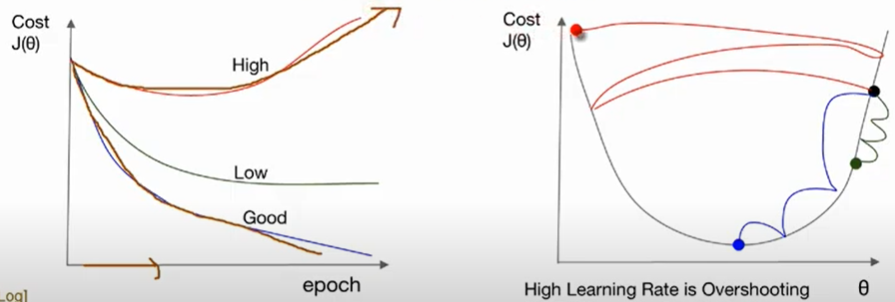

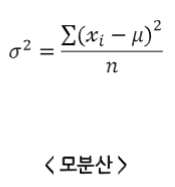

In [ ]:
#gradient

def grad(hyp, labels):
    with tf.GraeidntTape() as tape;
        loss_value = loss_fn(hyp, labels)
    return tape.gradient(loss_value, [W,b])

optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1)
optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))

In [144]:
# learning rate decay
starter_learning_rate = 0.1

learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=starter_learning_rate,
                                                              decay_steps=100,
                                                              decay_rate=0.96,
                                                              staircase=True)

In [ ]:
# stanardization, normalization

Standardization = (data - np.mean(data)) / sqrt( np.sum((data - np.mean(data))**2) / np.count(data) )

Normalization = (data - np.min(data,0)) / (np.max(data,0) - np.min(data,0))

# regularization (add term to loss)

## softmax & learning rate decay

In [229]:
x_train = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]

y_train = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]


dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train)) #

W = tf.Variable(tf.random.normal((3, 3)))
b = tf.Variable(tf.random.normal((3,)))

def softmax_fn(feature):
    hyp = tf.nn.softmax(tf.matmul(features, W) + b)
    return hyp

def loss_fn(hyp, features, labels):
    cost = tf.reduce_mean(-tf.reduce_sum(labels * tf.math.log(hyp), axis=1))
    return cost


In [230]:
is_decay = True
starter_learning_rate = 0.1
    
if(is_decay):    
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=starter_learning_rate,
                                                                 decay_steps=100,
                                                                 decay_rate=0.96,
                                                                 staircase=True)
    optimizer = tf.keras.optimizers.SGD(learning_rate)
else:
    optimizer = tf.keras.optimizers.SGD(learning_rate=starter_learning_rate)

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(softmax_fn(features),features,labels)
    return tape.gradient(loss_value, [W,b])

def accuracy_fn(hyp, lables):
    prediction = tf.argmax(hyp,1)
    is_correct = tf.equal(prediction, tf.argmax(labels,1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    return accuracy

EPOCHS = 1000
for step in range(EPOCHS):
    for features, labels  in iter(dataset):
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads = grad(softmax_fn(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("iter : {}, loss : {:.4f}".format(step, loss_fn(softmax_fn(features), features, labels)))
x_test = tf.cast(x_test, tf.float32)
y_test = tf.cast(y_test, tf.float32)
test_acc = accuracy_fn(softmax_fn(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

iter : 0, loss : 4.2583
iter : 100, loss : 0.6909
iter : 200, loss : 0.5945
iter : 300, loss : 0.5415
iter : 400, loss : 0.5042
iter : 500, loss : 0.4755
iter : 600, loss : 0.4524
iter : 700, loss : 0.4331
iter : 800, loss : 0.4167
iter : 900, loss : 0.4026
Testset Accuracy: 1.0000


## linear regression --> normalization, l2 loss, learning rate decay

In [219]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

W = tf.Variable(tf.random.normal((4, 1)), dtype=tf.float32)
b = tf.Variable(tf.random.normal((1,)), dtype=tf.float32)

In [220]:
def linearReg_fn(features):
    hypothesis = tf.matmul(features, W) + b
    return hypothesis

def loss_fn(hypothesis, features, labels):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    return cost
    
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5)

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linearReg_fn(features),features,labels)
    return tape.gradient(loss_value, [W,b]), loss_value

In [221]:
EPOCHS = 5

for step in range(EPOCHS):
    for features, labels  in dataset:
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        hypo_value = linearReg_fn(features)
        grads, loss_value = grad(linearReg_fn(features), features, labels)        
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))    
    print("Iter: {}, Loss: {:.4f}, Prediction: {}".format(step, loss_value, hypo_value))

Iter: 0, Loss: 1334175203328.0000, Prediction: [[ -814171.6]
 [-1639132.4]
 [-1289421.4]
 [ -903843. ]
 [-1065247.2]
 [-1074213.2]
 [ -984545.2]
 [-1253553.8]]
Iter: 1, Loss: 1465832591311513972327317504.0000, Prediction: [[2.7006821e+13]
 [5.4367504e+13]
 [4.2768953e+13]
 [2.9980807e+13]
 [3.5333987e+13]
 [3.5631384e+13]
 [3.2657396e+13]
 [4.1579360e+13]]
Iter: 2, Loss: inf, Prediction: [[-8.9517768e+20]
 [-1.8020844e+21]
 [-1.4176348e+21]
 [-9.9375444e+20]
 [-1.1711927e+21]
 [-1.1810504e+21]
 [-1.0824735e+21]
 [-1.3782039e+21]]
Iter: 3, Loss: inf, Prediction: [[2.9671871e+28]
 [5.9732524e+28]
 [4.6989421e+28]
 [3.2939333e+28]
 [3.8820766e+28]
 [3.9147511e+28]
 [3.5880049e+28]
 [4.5682431e+28]]
Iter: 4, Loss: inf, Prediction: [[-9.8351417e+35]
 [-1.9799150e+36]
 [-1.5575276e+36]
 [-1.0918186e+36]
 [-1.2867666e+36]
 [-1.2975970e+36]
 [-1.1892926e+36]
 [-1.5142058e+36]]


In [227]:
def normalization(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / denominator

xy = normalization(xy)

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

W = tf.Variable(tf.random.normal((4, 1)), dtype=tf.float32)
b = tf.Variable(tf.random.normal((1,)), dtype=tf.float32)

def l2_loss(loss, beta = 0.01):
    W_reg = tf.nn.l2_loss(W) # output = sum(t ** 2) / 2
    loss = tf.reduce_mean(loss + W_reg * beta)
    return loss

def loss_fn(hypothesis, features, labels, flag = False):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    if(flag):
        cost = l2_loss(cost)
    return cost

is_decay = True
starter_learning_rate = 0.1

if(is_decay):    
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=starter_learning_rate,
                                                                  decay_steps=50,
                                                                  decay_rate=0.96,
                                                                  staircase=True)
    optimizer = tf.keras.optimizers.SGD(learning_rate)
else:
    optimizer = tf.keras.optimizers.SGD(learning_rate=starter_learning_rate)

In [228]:
def grad(hypothesis, features, labels, l2_flag):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linearReg_fn(features),features,labels, l2_flag)
    return tape.gradient(loss_value, [W,b]), loss_value

EPOCHS = 101

for step in range(EPOCHS):
    for features, labels  in dataset:
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads, loss_value = grad(linearReg_fn(features), features, labels, False)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))        
    if step % 10 == 0:
        print("Iter: {}, Loss: {:.4f}".format(step, loss_value))

Iter: 0, Loss: 0.4815
Iter: 10, Loss: 0.0883
Iter: 20, Loss: 0.0669
Iter: 30, Loss: 0.0510
Iter: 40, Loss: 0.0392
Iter: 50, Loss: 0.0303
Iter: 60, Loss: 0.0239
Iter: 70, Loss: 0.0191
Iter: 80, Loss: 0.0155
Iter: 90, Loss: 0.0127
Iter: 100, Loss: 0.0106


## mnist

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
import tensorflow as tf

class Net(tf.keras.Model):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = tf.keras.layers.Flatten(input_shape=(28, 28))
        self.l1 = tf.keras.layers.Dense(520, activation='relu')
        self.l2 = tf.keras.layers.Dense(320, activation='relu')
        self.l3 = tf.keras.layers.Dense(240, activation='relu')
        self.l4 = tf.keras.layers.Dense(120, activation='relu')
        self.l5 = tf.keras.layers.Dense(10)

    def call(self, x):
        x = self.flatten(x)
        x = self.l1(x)
        x = self.l2(x)
        x = self.l3(x)
        x = self.l4(x)
        return self.l5(x)

# Instantiate the model
model = Net()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [3]:
model.fit(x_train, y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4323 - accuracy: 0.8779
Epoch 2/2
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1637 - accuracy: 0.9513


In [237]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer = 'adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2171 - accuracy: 0.9366
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0980 - accuracy: 0.9696
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0671 - accuracy: 0.9788
Epoch 4/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0535 - accuracy: 0.9829
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0421 - accuracy: 0.9865


In [238]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss, test_acc)
predictions = model.predict(x_test)
np.argmax(predictions[0])

313/313 [==============================] - 1s 2ms/step - loss: 0.0627 - accuracy: 0.9810
0.06265788525342941 0.9810000061988831


7

## fashion mnist

In [240]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] #10개

4431872/4422102 [==============================] - 1s 0us/step


In [241]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [244]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer = 'adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2578 - accuracy: 0.9264
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1141 - accuracy: 0.9662
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0788 - accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0571 - accuracy: 0.9829
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0448 - accuracy: 0.9856


In [245]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 15.0135 - accuracy: 0.1128
15.013505935668945
Test accuracy: 0.1128000020980835


## imdb

In [248]:
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))
print(train_data[0])

Training entries: 25000, labels: 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [252]:
word_index = imdb.get_word_index()

word_index = {k : (v+3) for k, v in word_index.items()}
word_index["<PAD>"] = 0 #공백
word_index["<START>"] = 1 #시작
word_index["<UNK>"] = 2 #unknon 모르는 단어
word_index["<UNUSED>"] = 3 #사용되지 않는 것

reverse_word_index = dict([value, key] for (key, value) in word_index.items())

def decode_review(text):
    return ' '.join([reverse_word_index.get(i,'?') for i in text])

print(train_labels[4])
decode_review(train_data[4])

0


"<START> worst mistake of my life br br i picked this movie up at target for 5 because i figured hey it's sandler i can get some cheap laughs i was wrong completely wrong mid way through the film all three of my friends were asleep and i was still suffering worst plot worst script worst movie i have ever seen i wanted to hit my head up against a wall for an hour then i'd stop and you know why because it felt damn good upon bashing my head in i stuck that damn movie in the <UNK> and watched it burn and that felt better than anything else i've ever done it took american psycho army of darkness and kill bill just to get over that crap i hate you sandler for actually going through with this and ruining a whole day of my life"

학습과 평가를 위해 동일 길이 설정 => 256글자 padding 이용 (뒤의 길이는 0으로 맞춰줌)

In [253]:
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

print(len(train_data[0]), len(test_data[0]))
print(train_data[0])

256 256
[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  10

In [256]:
vocab_size = 10000 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 16))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(16, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 16)          160000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [258]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [259]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

his = model.fit(partial_x_train, partial_y_train, epochs=40,
               batch_size = 512, validation_data = (x_val, y_val),
                verbose=1)

Epoch 1/40
30/30 [==============================] - 1s 22ms/step - loss: 0.6919 - accuracy: 0.5133 - val_loss: 0.6895 - val_accuracy: 0.5520
Epoch 2/40
30/30 [==============================] - 1s 19ms/step - loss: 0.6859 - accuracy: 0.6402 - val_loss: 0.6815 - val_accuracy: 0.6819
Epoch 3/40
30/30 [==============================] - 1s 17ms/step - loss: 0.6737 - accuracy: 0.7173 - val_loss: 0.6662 - val_accuracy: 0.6852
Epoch 4/40
30/30 [==============================] - 1s 18ms/step - loss: 0.6530 - accuracy: 0.7348 - val_loss: 0.6425 - val_accuracy: 0.7245
Epoch 5/40
30/30 [==============================] - 1s 18ms/step - loss: 0.6235 - accuracy: 0.7560 - val_loss: 0.6113 - val_accuracy: 0.7558
Epoch 6/40
30/30 [==============================] - 1s 18ms/step - loss: 0.5852 - accuracy: 0.7992 - val_loss: 0.5735 - val_accuracy: 0.7956
Epoch 7/40
30/30 [==============================] - 1s 18ms/step - loss: 0.5416 - accuracy: 0.8276 - val_loss: 0.5326 - val_accuracy: 0.8162
Epoch 8/40
30

In [260]:
results = model.evaluate(test_data, test_labels)
print(results)

782/782 [==============================] - 1s 857us/step - loss: 0.3290 - accuracy: 0.8727
[0.3289790749549866, 0.8726800084114075]
